<a href="https://colab.research.google.com/github/PranavR-2001/Transfer_learning_Food_vision_project/blob/main/Transfer_learning_Food_Vision_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOOD VISION Model

Making a deep learning model that is able to classify different food classes. Specifically speaking 101 classes of food types. The dataset we are going to use is the Food101 dataset from the tensorflow datasets. 

We are going to make use of **Transfer learning** to make the classification model. We will use the **EfficientNetB0** model from the **tf.keras.application** API

## Download the dataset from tensorflow datasets

In [2]:
# import tensorflow datasets
import tensorflow_datasets as tfds
import tensorflow as tf


In [3]:
# List the entire datasets from tensorflow datasets
dataset_list = tfds.list_builders()
dataset_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [4]:
# Check for Food101 dataset in the list
print("food101" in dataset_list)

True


In [5]:
# load in the data (it will take about 5-6 minutes and 4.5 GB of memory)
(train_data, test_data), ds_info = tfds.load(name = "food101",
                                             split = ['train', 'validation'],
                                             shuffle_files = True,
                                             as_supervised = True,
                                             with_info = True)
# we use as_supervised as true so that data is returned as a tuple (data, label)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteTJJ29B/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteTJJ29B/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [6]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    version=2.0.0,
    description='This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.',
    homepage='https://www.vision.ee.ethz.ch/datasets_extra/food-101/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    total_num_examples=101000,
    splits={
        'train': 75750,
        'validation': 25250,
    },
    supervised_keys=('image', 'label'),
    citation="""@inproceedings{bossard14,
      title = {Food-101 -- Mining Discriminative Components with Random Forests},
      

In [7]:
# get the class names
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## Exploring the food101 dataset - Visualize the data

In [8]:
# Taking one sample from the dataset
single_sample_train = train_data.take(1)
single_sample_train

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [9]:
# Seeing the information about the single sample
for image, label in single_sample_train:
  print(f"""
  Image shape : {image.shape},
  Image datatype : {image.dtype},
  Target class from Food101(tensor form) : {label},
  class name (str form) : {class_names[label.numpy()]} 
  """)


  Image shape : (512, 512, 3),
  Image datatype : <dtype: 'uint8'>,
  Target class from Food101(tensor form) : 16,
  class name (str form) : cheesecake 
  


In [10]:
# how the image looks like
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  84,  92],
        [ 86,  85,  93],
        [ 93,  92, 100],
        ...,
        [120, 196, 245],
        [120, 198, 246],
        [121, 199, 247]],

       [[ 88,  88,  96],
        [ 82,  82,  90],
        [ 88,  88,  96],
        ...,
        [116, 192, 244],
        [118, 195, 249],
        [119, 196, 248]],

       [[ 77,  80,  89],
        [ 75,  78,  87],
        [ 82,  86,  95],
        ...,
        [115, 189, 252],
        [117, 192, 255],
        [118, 194, 255]],

       ...,

       [[159, 166, 194],
        [154, 161, 187],
        [171, 178, 204],
        ...,
        [219, 216, 235],
        [223, 220, 239],
        [227, 226, 244]],

       [[170, 179, 208],
        [169, 179, 206],
        [173, 183, 210],
        ...,
        [218, 217, 235],
        [223, 222, 240],
        [226, 227, 245]],

       [[168, 177, 206],
        [170, 179, 208],
        [152, 162, 189],
        ...,
        [224, 223, 24

(-0.5, 511.5, 511.5, -0.5)

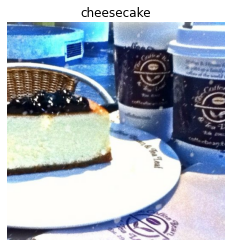

In [11]:
# plot the image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

## Preprocess the image - Create an input pipeline

In [12]:
# Create a preprocessing function
def preprocess_image(image, label, img_shape = 224):
  """
  Converts the image from type uint8 to float32 and resize the image into specified size
  """
  image = tf.image.resize(image, size = [img_shape, img_shape])
  return tf.cast(image, dtype= tf.float32), label

### Batch and prepare the dataset

In [13]:
# Map preprocessing function to training_data (and parallelize the process)
train_data = train_data.map(map_func= preprocess_image, num_parallel_calls= tf.data.AUTOTUNE)

# shuffle the train_data and turn them into batches and prefect it for efficiency
train_data = train_data.shuffle(buffer_size= 1000).batch(batch_size = 32).prefetch(buffer_size= tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(map_func= preprocess_image, num_parallel_calls= tf.data.AUTOTUNE).batch(32).prefetch(buffer_size = tf.data.AUTOTUNE)

### Create the modelling callbacks

In [14]:
# Create the tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir)
  print(f"Saving Tensorboard log file to : {log_dir}")
  return tensorboard_callback


# Create the model checkpoint callback
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path,
                                                      monitor = 'val_accuracy',
                                                      verbose = 0,
                                                      save_best_only = True,
                                                      save_weights_only = True)


### Setup mixed precision training

Mixed precision is a new feature of Tensorflow that helps in increasing the speed in which the model trains by a great factor. 

But in order for mixed precision to work, you should have access to a **GPU** that have a compute capability of 7.0 or above.

For more information about mixed precision refer : https://www.tensorflow.org/guide/mixed_precision

In [15]:
# turn on mixed precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [16]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extraction model

Transfer learning involves using an already trained model and train it to solve our current problem ie, classifying the 101 classes of food.

We are also going to be using **Fine tuning**. For doing fine tuning we are going to first get a feature extraction model.

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create the base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top= False)
base_model.trainable = False # Freeze the base_model

# Create functional model
inputs = layers.Input(shape = input_shape, name = 'input_layer')
x = base_model(inputs, training = False)# put the layer in inference mode
x = layers.GlobalAveragePooling2D(name = 'Global_Pooling_layer')(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation('softmax',dtype = tf.float32, name = 'output_layer')(x)

# Connect the model
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

16719872/16705208 [==============================] - 0s 0us/step


In [18]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
Global_Pooling_layer (Global (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
output_layer (Activation)    (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [20]:
# Checking policy for each layer
for layer in model_1.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
Global_Pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
output_layer True float32 <Policy "float32">


In [21]:
# fit the model_1
history_1 = model_1.fit(train_data,
                        epochs = 3,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.15 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name='training_logs',
                                                                 experiment_name = "model_1_feature_extraction"),
                                     model_checkpoint])

Saving Tensorboard log file to : training_logs/model_1_feature_extraction/20211002-123659
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 311s 112ms/step - loss: 1.8200 - accuracy: 0.5577 - val_loss: 1.2108 - val_accuracy: 0.6793
Epoch 2/3
2368/2368 [==============================] - 244s 102ms/step - loss: 1.2930 - accuracy: 0.6665 - val_loss: 1.1176 - val_accuracy: 0.7023
Epoch 3/3
2368/2368 [==============================] - 244s 102ms/step - loss: 1.1431 - accuracy: 0.7011 - val_loss: 1.0891 - val_accuracy: 0.7090


In [22]:
result_model_1 = model_1.evaluate(test_data)
result_model_1

790/790 [==============================] - 81s 102ms/step - loss: 1.0927 - accuracy: 0.7066


[1.0927443504333496, 0.7066138386726379]

In [23]:
# Plotting the accuracy and loss curves
# create a function
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

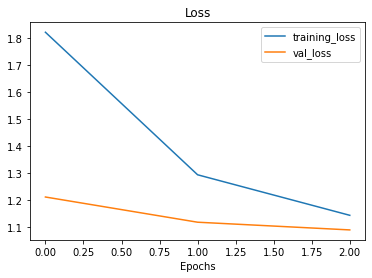

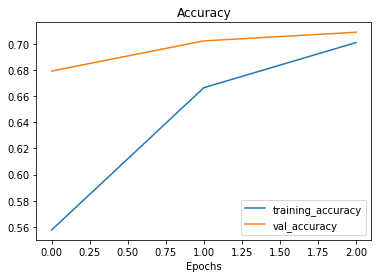

In [24]:
# plot loss curves for model_1
plot_loss_curves(history_1)

## Start fine tuning model_1

In [25]:
model_1.save_weights("model_1.h5", overwrite= True)

In [26]:
# make base model trainable
base_model.trainable = True

# Now freeze all the layers except the last 5 layers
for layer in model_1.layers[1].layers[:-5]:
  layer.trainable = False

In [27]:
# check the change we made
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_1 False
rescaling False
normalization False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv False
blo

In [28]:
# Re-compile the model (compile the model whenever we make a change)
model_1.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [29]:
# fit the model with fine tuning
history_fine_tuned_model_1 = model_1.fit(train_data,
                                         epochs = 10,
                                         steps_per_epoch = len(train_data),
                                         validation_data = test_data,
                                         validation_steps = int(0.15 * len(test_data)),
                                         initial_epoch = history_1.epoch[-1],
                                         callbacks = [create_tensorboard_callback("training_logs",
                                                                                  "fine_tuned_model_1")])

Saving Tensorboard log file to : training_logs/fine_tuned_model_1/20211002-125241


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10
2368/2368 [==============================] - 275s 111ms/step - loss: 1.2841 - accuracy: 0.6637 - val_loss: 1.0688 - val_accuracy: 0.7090
Epoch 4/10
2368/2368 [==============================] - 272s 114ms/step - loss: 0.9419 - accuracy: 0.7424 - val_loss: 1.0651 - val_accuracy: 0.7174
Epoch 5/10
2368/2368 [==============================] - 262s 110ms/step - loss: 0.7261 - accuracy: 0.7950 - val_loss: 1.0831 - val_accuracy: 0.7145
Epoch 6/10
2368/2368 [==============================] - 272s 114ms/step - loss: 0.4363 - accuracy: 0.8662 - val_loss: 1.2142 - val_accuracy: 0.7076
Epoch 8/10
2368/2368 [==============================] - 263s 110ms/step - loss: 0.3416 - accuracy: 0.8935 - val_loss: 1.3044 - val_accuracy: 0.7082
Epoch 9/10
2368/2368 [==============================] - 262s 110ms/step - loss: 0.2828 - accuracy: 0.9103 - val_loss: 1.4556 - val_accuracy: 0.6817
Epoch 10/10
2368/2368 [==============================] - 260s 109ms/step - loss: 0.2460 - accuracy: 0.9203 - val

In [30]:
# Evaluation the fine-tuned model_1
results_model_1_fine_tuned = model_1.evaluate(test_data)
results_model_1_fine_tuned

790/790 [==============================] - 73s 92ms/step - loss: 1.5901 - accuracy: 0.7008


[1.5900505781173706, 0.7007920742034912]

In [31]:
# Comparing both histories before and after fine tuning
def compare_historys(original_history, new_history, initial_epoch = 5):
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_loss = original_history.history['val_loss']
  val_accuracy = original_history.history['val_accuracy']

  # combining original history with new history
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_accuracy + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # make the plots
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label= 'Training accuracy')
  plt.plot(total_val_acc, label='validation accuracy')
  plt.plot([initial_epoch-1, initial_epoch-1],
           plt.ylim(), label = 'Start fine tuning')
  plt.legend(loc = 'lower right')
  plt.title('Traingin and validation accuracy')

  plt.subplot(2,1,2)
  plt.plot(total_loss, label = 'training loss')
  plt.plot(total_val_loss, label = 'validation loss')
  plt.plot([initial_epoch-1, initial_epoch-1],
           plt.ylim(), label = 'Start fine tuning')
  plt.legend(loc = 'upper right')
  plt.title('Training and validation loss')
  plt.xlabel('epoch')
  plt.show()

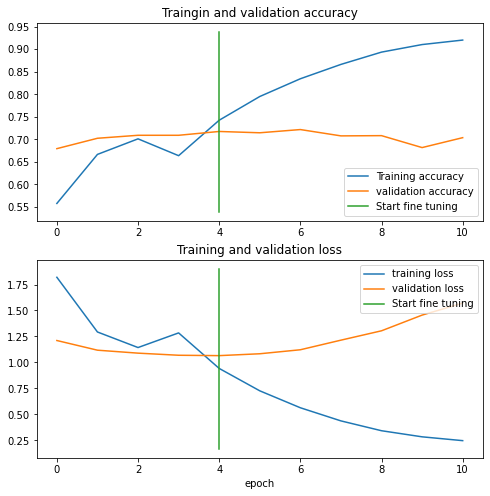

In [32]:
# Compare the models
compare_historys(history_1, history_fine_tuned_model_1)

In [43]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
Global_Pooling_layer (Global (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
output_layer (Activation)    (None, 101)               0         
Total params: 4,178,952
Trainable params: 910,821
Non-trainable params: 3,268,131
_________________________________________________________________


## Make predictions on your own food image

In [72]:
# predict on a new data
def pred_and_plot(model_name, filename, img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  show_img = img/255.

  # make prediction
  pred = model_name.predict(tf.expand_dims(img, axis =0))
  
  # get the pred class
  pred_class = class_names[tf.argmax(pred[0])]
  accuracy = pred[0].max()
  accuracy_percent = accuracy * 100

  # plot the image with prediction
  plt.imshow(show_img)
  plt.title(f"Predicted food class :: {pred_class} || with accuracy of :: {accuracy_percent:.2f}%")
  plt.axis(False)


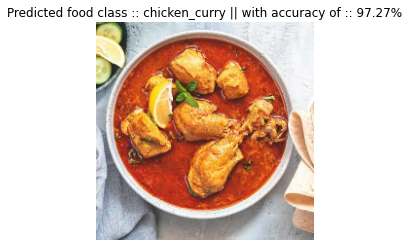

In [73]:
pred_and_plot(model_1, "chi.jpg")


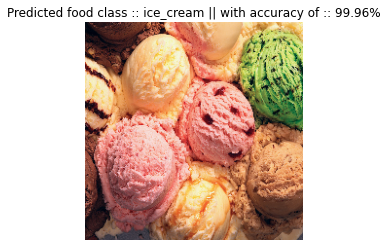

In [74]:
pred_and_plot(model_1, "cream.jpg")

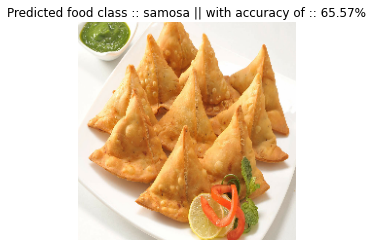

In [75]:
pred_and_plot(model_1, "samosa.jpg")